# Impor library yang diperlukan

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Impor dataset


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Tugas AJS/Search Telu Dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   506 non-null    int64 
 1   username   506 non-null    object
 2   text       505 non-null    object
 3   timestamp  506 non-null    object
 4   replies    506 non-null    int64 
 5   retweets   506 non-null    int64 
 6   quotes     506 non-null    int64 
 7   likes      506 non-null    int64 
 8   url        506 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.7+ KB


In [5]:
data.head()

,tweet_id,username,text,timestamp,replies,retweets,quotes,likes,url
0,1668525525508440067,@kompascom,Putu Arjuna Nugraha Eka Wana mahasiswa Telkom ...,2023-06-13 07:47:00+00:00,10,20,4,42,https://twitter.com/kompascom/status/166852552...
1,1668830730351198208,@TelUniversity,Keren! Tel-U Menempati Peringkat 54 Dunia dala...,2023-06-14 04:00:00+00:00,0,0,0,3,https://twitter.com/TelUniversity/status/16688...
2,1668829758581518337,@radarbandung,"Pamit ke Rumah Teman, Mahasiswa Telkom Univers...",2023-06-14 03:56:00+00:00,0,1,0,1,https://twitter.com/radarbandung/status/166882...
3,1668551348650926082,@TelUniversity,Xynexis dan Telkom University Bandung Lakukan ...,2023-06-13 09:30:00+00:00,0,1,0,2,https://twitter.com/TelUniversity/status/16685...
4,1668641833805844480,@smbtelkom,Wih ada telkom nih @TelUniversity,2023-06-13 15:29:00+00:00,0,0,0,0,https://twitter.com/smbtelkom/status/166864183...


Bangun graf jaringan retweet menggunakan NetworkX

In [6]:
G = nx.DiGraph()
for i, row in data.iterrows():
    G.add_edge(row['username'], row['retweets'])

# Hitung degree centrality

In [7]:
degree_centrality = nx.degree_centrality(G)

# Hitung degree

In [8]:
degree = dict(G.degree())

# Cari 5 nilai degree centrality tertinggi

In [9]:
degree_centrality = pd.DataFrame(data['username'].value_counts()).reset_index()
degree_centrality.columns = ['username', 'degree_centrality']

In [10]:
top_5_degree_centrality = degree_centrality.sort_values('degree_centrality', ascending=False)[:5]

In [11]:
tweets = []
for user in top_5_degree_centrality['username']:
    tweet = data.loc[data['username'] == user, 'text']
    if len(tweet) > 0:
        tweets.append(tweet.iloc[0])
    else:
        tweets.append('No tweet available')

hasil_dataset = pd.DataFrame({'username': top_5_degree_centrality['username'], 'tweet': tweets})
hasil_dataset['degree_centrality'] = top_5_degree_centrality['degree_centrality']

In [12]:
hasil_dataset.head()

,username,tweet,degree_centrality
0,@TelUCareer,Bersedia ditugaskan di seluruh Indonesia\n\nIn...,107
1,@TelUniversity,Keren! Tel-U Menempati Peringkat 54 Dunia dala...,65
2,@direktoratputi,Telnologi Pengganti Base Transceiver Station (...,20
3,@smbtelkom,Wih ada telkom nih @TelUniversity,19
4,@nihonnomatsuri,-------------------\n#NihonnoMatsuri14\n#Nihon...,9


# Visualisasikan graf jaringan retweet

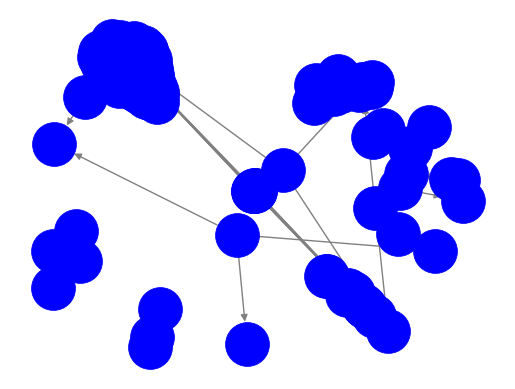

In [13]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=1000, node_color='blue', edge_color='gray', linewidths=0.5)
plt.axis('off')
plt.show()

# Hitung nilai degree dan eigenvector dari user yang paling berpengaruh




In [17]:
most_influential_user = top_5_degree_centrality.iloc[0]['username']
# Check if the user is in the graph
if most_influential_user in G:
    # Get the user's degree and eigenvector centrality
    degree = G.degree[most_influential_user]
    eigenvector_centrality = nx.eigenvector_centrality(G)[most_influential_user]

    # Print the user's information
    print(f"\nUser paling berpengaruh: {most_influential_user}")
    print(f"Degree : {degree}")
    print(f"Eigenvector : {eigenvector_centrality}")

else:
    print(f"User {most_influential_user} is not in the graph.")


User paling berpengaruh: @TelUCareer
Degree : 2
Eigenvector : 7.196314200741074e-05
